/volumes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


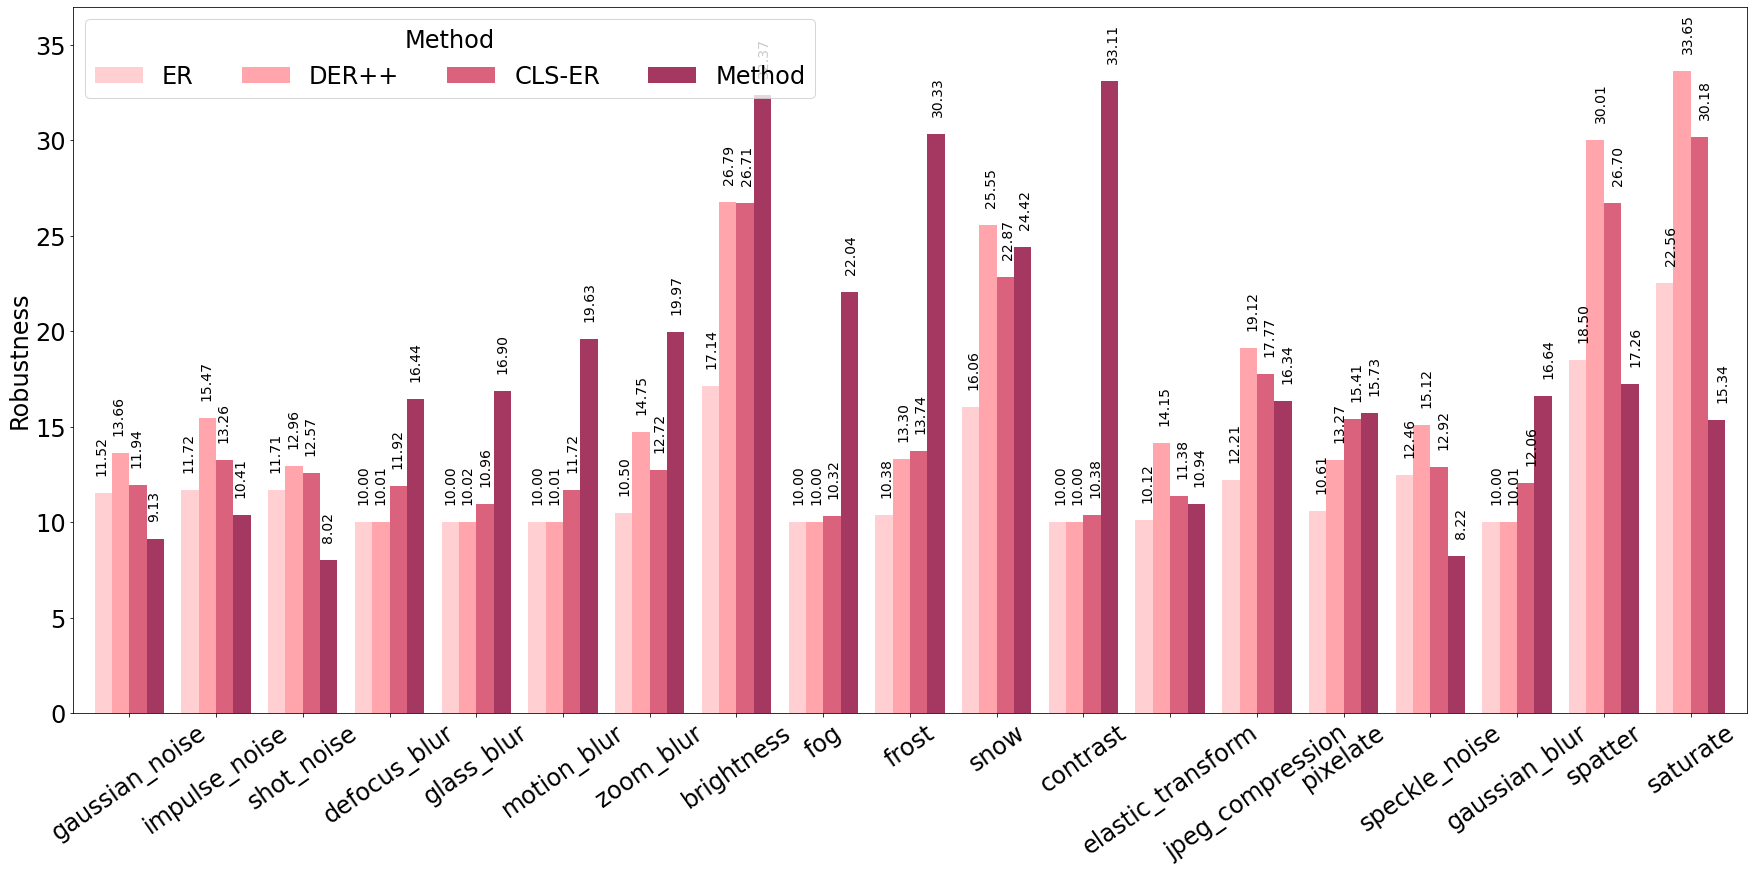

In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


col = [
#     "#ffe5d9",
    "#ffcfd2",
    '#ffa5ab',
    '#da627d',
    '#a53860',
]

path = '/volumes2/continual_learning/paper'

order = ['er', 'der', 'cls-er', 'aux']
label_order = ['ER', 'DER++', 'CLS-ER', 'Method']
cor_order = ['gaussian_noise', 'impulse_noise', 'shot_noise',
             'defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur',
            'brightness', 'fog', 'frost', 'snow',
            'contrast', 'elastic_transform', 'jpeg_compression', 'pixelate',
            'speckle_noise', 'gaussian_blur', 'spatter',
                    'saturate']

font = 24

def plot_bar_chart(df, y_label, limits):
    # get the max of the y_label
    # sns.set()
    ax = df.plot(kind="bar", width=.8,  color=col, figsize=(30, 13))
    for p in ax.patches:
        ax.annotate(str('{:.2f}'.format(p.get_height())), (p.get_x() * 1.005, p.get_height() + 1.07), 
                    color="black", rotation=90, size=14)
        
    fig = ax.get_figure()
    # Change the axes labels with font size, color and weight
    # ax.set_xlabel("Detection Head", size=16, weight='bold', color='black')
    ax.set_ylabel(y_label, size=font, color='black')
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_label = x_axis.get_label()
    x_label.set_visible(False)
    plt.ylim(limits[0], limits[1])
    plt.xticks(rotation=35, size=font)#, weight='bold')
    plt.yticks(size=font)
    plt.legend(label_order, loc='upper left', title="Method", ncol=len(df.columns), fontsize=font, title_fontsize=font)
    ax.set_facecolor('none')
    
        
#     fig.savefig(os.path.join(path, 'corrupt.pdf'), dpi=300, bbox_inches='tight')
#     fig.savefig(os.path.join(path, 'corrupt.png'), dpi=300, bbox_inches='tight')


if __name__ == '__main__':
    #Load file
    df = pd.read_csv('/volumes2/continual_learning/paper/analysis/corrupt/cor_cif10.csv')

    pd.options.display.float_format = "{:,.2f}".format
    
    df_index = order
    map_limits = 0,37
    
    #df_pivot_map = pd.pivot_table(df,index="method", columns="corruption", values="accuracy") #.reindex(df_index)
    df_pivot_map = pd.pivot_table(df,index="corruption", columns="method", values="accuracy") #.reindex(df_index)    
    df_pivot_map = df_pivot_map.reindex(columns=order)
    df_pivot_map = df_pivot_map.reindex(index=cor_order)

    plot_bar_chart(df_pivot_map, y_label="Robustness", limits=map_limits)



Method    er   der  cls-er   aux
Sev                             
1      12.89 18.15   17.01 20.70
2      11.91 15.69   14.79 20.04
3      11.33 13.96   13.85 19.05
4      10.97 12.67   13.08 18.04
5      10.90 11.89   12.16 16.91


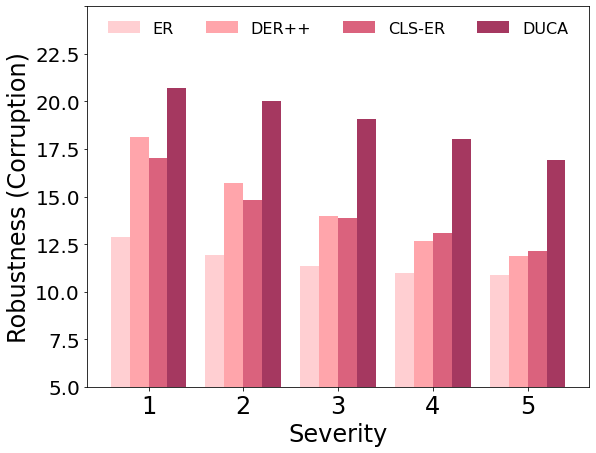

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


col = [
#     "#ffe5d9",
    "#ffcfd2",
    '#ffa5ab',
    '#da627d',
    '#a53860',
]

path = '/volumes2/continual_learning/paper/icml'

order = ['er', 'der', 'cls-er', 'aux']
label_order = ['ER', 'DER++', 'CLS-ER', 'DUCA']
sev_order = ['1', '2', '3', '4', '5']

font = 24

def plot_bar_chart(df, y_label, limits):
    # get the max of the y_label
    # sns.set()
    fig, ax = plt.subplots(figsize=(9, 7))
    df.plot(kind="bar", width=.8,  color=col, figsize=(9, 7), ax=ax)
#     for p in ax.patches:
#         ax.annotate(str('{:.2f}'.format(p.get_height())), (p.get_x() * 1.005, p.get_height() + 0.8), 
#                     color="black", rotation=90, size=9)
        
#     fig = ax.get_figure()
    # Change the axes labels with font size, color and weight
    # ax.set_xlabel("Detection Head", size=16, weight='bold', color='black')
    ax.set_xlabel('Severity', size=font, color='black')
    ax.set_ylabel(y_label, size=font, color='black')
    ax.set_xticklabels(sev_order)

#     ax1 = plt.axes()
#     x_axis = ax1.axes.get_xaxis()
    plt.ylim(limits[0], limits[1])
    plt.xticks(size=font, rotation=0.0)#, weight='bold')
    plt.yticks(size=20)
    plt.legend(label_order, loc='upper center', ncol=len(df.columns), fontsize=16,frameon=False,)
    ax.set_facecolor('none')
    
    y_ticks = ax.yaxis.get_major_ticks()
    y_ticks[-1].label1.set_visible(False) 
        
    fig.savefig(os.path.join(path, 'corr_avg_cif10.pdf'), dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path, 'corr_avg_cif10.png'), dpi=300, bbox_inches='tight')


if __name__ == '__main__':
    #Load file
    df = pd.read_excel('/volumes2/continual_learning/paper/analysis/corrupt/cor_cif10_all.xls', sheet_name='avg')
    pd.options.display.float_format = "{:,.2f}".format
    
    df_pivot_map = pd.pivot_table(df,index="Sev", columns="Method", values="acc") #.reindex(df_index)            
    df_pivot_map = df_pivot_map.reindex(columns=order)
    print(df_pivot_map)

    map_limits=5,25
    plot_bar_chart(df_pivot_map, y_label="Robustness (Corruption)", limits=map_limits)



method    er   der  cls-er  aux_ema
eps                                
0.00   47.79 66.41   62.39    70.81
0.00   41.20 58.33   52.14    60.78
0.00   35.09 49.27   42.34    50.61
0.00   24.99 32.83   25.68    29.29
0.01   12.26 11.68    8.36     8.42


/volumes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


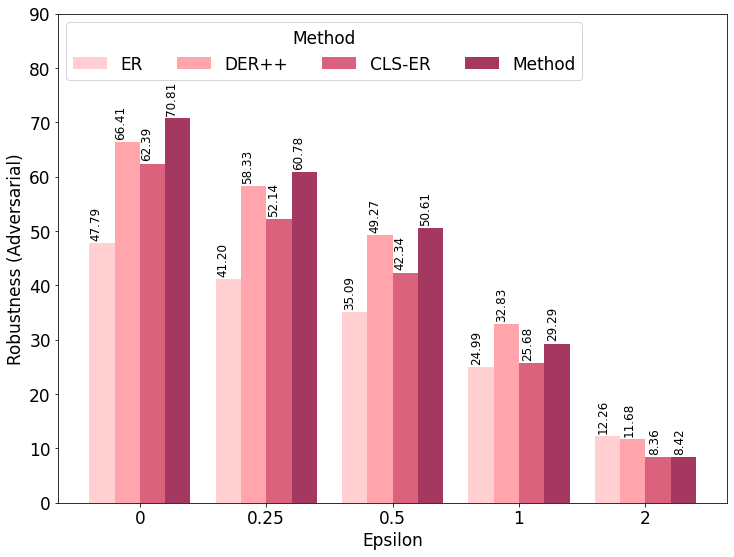

In [236]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


col = [
#     "#ffe5d9",
    "#ffcfd2",
    '#ffa5ab',
    '#da627d',
    '#a53860',
]

path = '/volumes2/continual_learning/paper'

order = ['er', 'der', 'cls-er', 'aux_ema']
label_order = ['ER', 'DER++', 'CLS-ER', 'Method']
cor_order = ['0', '0.25', '0.5', '1', '2']

font = 17

def plot_bar_chart(df, y_label, limits):
    # get the max of the y_label
    # sns.set()
    ax = df.plot(kind="bar", width=.8,  color=col, figsize=(12, 9))
    for p in ax.patches:
        ax.annotate(str('{:.2f}'.format(p.get_height())), (p.get_x() * 1.005, p.get_height() + 1.07), 
                    color="black", rotation=90, size=12)
        
    fig = ax.get_figure()
    # Change the axes labels with font size, color and weight
    # ax.set_xlabel("Detection Head", size=16, weight='bold', color='black')
    ax.set_xlabel('Epsilon', size=font, color='black')
    ax.set_ylabel(y_label, size=font, color='black')
    ax.set_xticklabels(cor_order)

    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    plt.ylim(limits[0], limits[1])
    plt.xticks(size=font, rotation=0.0)#, weight='bold')
    plt.yticks(size=font)
    plt.legend(label_order, loc='upper left', title="Method", ncol=len(df.columns), fontsize=font, title_fontsize=font)
    ax.set_facecolor('none')
    
        
    fig.savefig(os.path.join(path, 'adv.pdf'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(path, 'adv.png'), dpi=300, bbox_inches='tight')


if __name__ == '__main__':
    #Load file
    df = pd.read_csv('/volumes2/continual_learning/paper/analysis/adv/adv_cif10_s20.csv')

    pd.options.display.float_format = "{:,.2f}".format
    
    df_index = order
    map_limits = 0,90
    
    #df_pivot_map = pd.pivot_table(df,index="method", columns="corruption", values="accuracy") #.reindex(df_index)
    df_pivot_map = pd.pivot_table(df,index="eps", columns="method", values="robustness") #.reindex(df_index)    
    df_pivot_map = df_pivot_map.reindex(columns=order)
    #df_pivot_map = df_pivot_map.reindex(index=cor_order)
    print(df_pivot_map)
    
    plot_bar_chart(df_pivot_map, y_label="Robustness (Adversarial)", limits=map_limits)



In [ ]:
#cifar100

Method   er  der  cls-er  aux
Sev                          
1      4.46 5.23    5.32 5.07
2      3.39 4.07    4.13 4.67
3      3.12 3.87    3.86 4.03
4      2.58 3.19    3.22 3.37
5      2.21 2.62    2.68 2.70


/volumes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


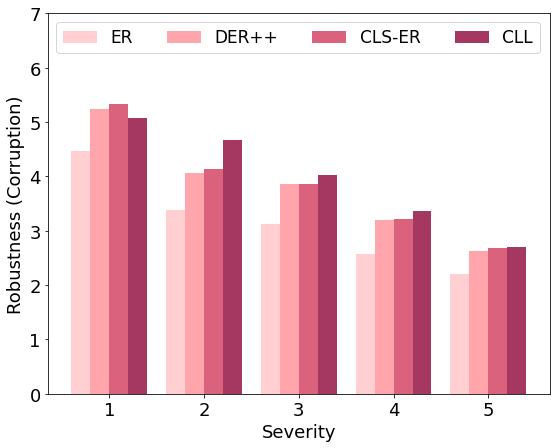

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


col = [
#     "#ffe5d9",
    "#ffcfd2",
    '#ffa5ab',
    '#da627d',
    '#a53860',
]

path = '/volumes2/continual_learning/paper'

order = ['er', 'der', 'cls-er', 'aux']
label_order = ['ER', 'DER++', 'CLS-ER', 'CLL']
sev_order = ['1', '2', '3', '4', '5']

font = 18

def plot_bar_chart(df, y_label, limits):
    # get the max of the y_label
    # sns.set()
    ax = df.plot(kind="bar", width=.8,  color=col, figsize=(9, 7))
#     for p in ax.patches:
#         ax.annotate(str('{:.2f}'.format(p.get_height())), (p.get_x() * 1.005, p.get_height() + 0.8), 
#                     color="black", rotation=90, size=9)
        
    fig = ax.get_figure()
    # Change the axes labels with font size, color and weight
    # ax.set_xlabel("Detection Head", size=16, weight='bold', color='black')
    ax.set_xlabel('Severity', size=font, color='black')
    ax.set_ylabel(y_label, size=font, color='black')
    ax.set_xticklabels(sev_order)

    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    plt.ylim(limits[0], limits[1])
    plt.xticks(size=font, rotation=0.0)#, weight='bold')
    plt.yticks(size=font)
    plt.legend(label_order, loc='upper left', ncol=len(df.columns), fontsize=17, title_fontsize=font)
    ax.set_facecolor('none')
    
        
    fig.savefig(os.path.join(path, 'corr_avg_cif100.pdf'), dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path, 'corr_avg_cif100.png'), dpi=300, bbox_inches='tight')


if __name__ == '__main__':
    #Load file
    df = pd.read_excel('/volumes2/continual_learning/paper/analysis/corrupt/cor_cif100_all.xls', sheet_name='avg')
    pd.options.display.float_format = "{:,.2f}".format
    
    df_pivot_map = pd.pivot_table(df,index="Sev", columns="Method", values="acc") #.reindex(df_index)            
    df_pivot_map = df_pivot_map.reindex(columns=order)
    print(df_pivot_map)

    map_limits=0,7
    plot_bar_chart(df_pivot_map, y_label="Robustness (Corruption)", limits=map_limits)



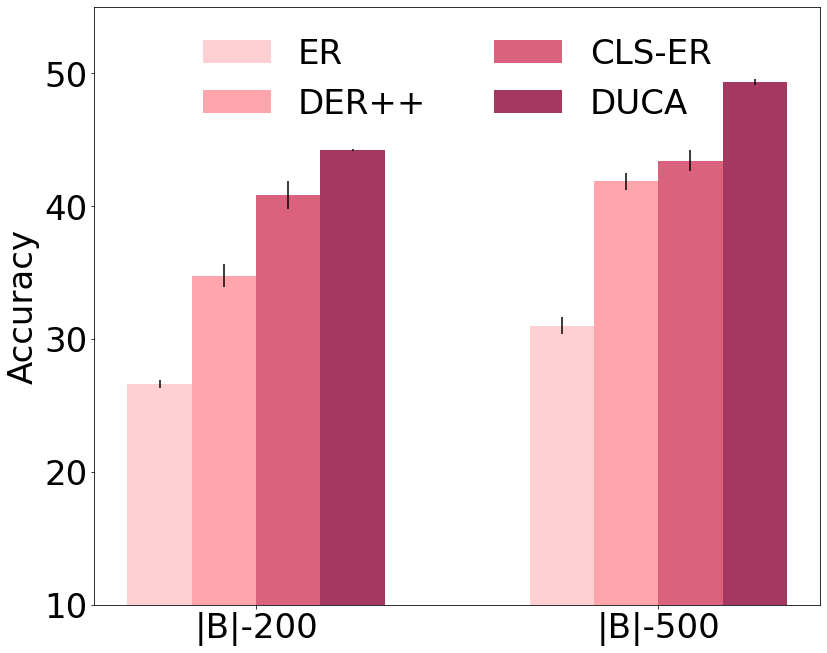

/volumes2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

sgd = [20.83]
sgd_std = [0.24]
joint = [49.61]
joint_std = [0.69]

buffer = ['|B|-200', '|B|-500']
labels = ['ER', 'DER++', 'CLS-ER', 'DUCA']

er = [26.59, 31.01]
der = [34.75, 41.87]
cls = [40.83, 43.41]
ccl = [44.23, 49.32]

er_std = [0.31, 0.62]
der_std = [0.87, 0.63]
cls_std = [1.07, 0.80]
ccl_std = [0.05, 0.23]

fig, ax = plt.subplots(1, 1, figsize=(13, 11))

colors=[
    "#ffcfd2",
    '#ffa5ab',
    '#da627d',
    '#a53860'
]


x = np.arange(len(buffer))   # the label locations
width = 0.16 # the width of the bars
rects1 = ax.bar(x - (3*width)/2, er, yerr=er_std, width=width, color= colors[0], label=labels[0]) #hatch='///'
rects_e = ax.bar(x - width/2, der, yerr=der_std, width=width, color= colors[1], label=labels[1])
rects_s = ax.bar(x + width/2, cls, yerr=cls_std, width=width, color= colors[2], label=labels[2])
rects2 = ax.bar(x + (3*width)/2, ccl, yerr=ccl_std, width=width, color= colors[3], label=labels[3])

ax.set_ylim(10, 55)
font = 34

ax.legend([rects1, rects_e, rects_s, rects2],labels, fontsize=34,ncol=2, loc="upper center", frameon=False)

ax.set_xticks(x)
ax.set_xticklabels(buffer,fontsize=font)
# ax.set_xlabel('Buffer Size',fontsize=font)
ax.set_ylabel('Accuracy',fontsize=font)
plt.tick_params(axis="y", labelsize=font)      # To change the y-axis

plt.show()
fig.savefig('/volumes2/continual_learning/paper/icml/domain_graph_m.pdf', quality=100, bbox_inches='tight')


In [ ]:

lst_methods = {
    'DER++': '/data/output-ai/shruthi.gowda/continual/domain_net/base/tiny_param/results/domain-il/domain-net/derpp/cll-derpp-%s-domain-netv2-s0',
    'ER': '/data/output-ai/shruthi.gowda/continual/domain_net/base/tiny_param/results/domain-il/domain-net/er/cll-er-%s-domain-netv2-s0',
    'cls-er': '/data/output-ai/shruthi.gowda/continual/domain_net/results/domain-il/domain-net/clser/cll-cls-%s-domain-netv2-64-l20.1-0.01-s0_stable_model',
    'aux': '/data/output-ai/shruthi.gowda/continual/domain_net/results/domain-il/domain-net/derpp_mm_eman1/cll-%s-domain-netv2-lr0.03-l20.10.01-em0.06-s2_ema_net1',
}
num_tasks = 6
annot = True

x_labels = [f"T{i}" for i in range(1, num_tasks + 1)]
y_labels = [f"After T{i}" for i in range(1, num_tasks + 1)]

n_rows, n_cols = 1, 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(13, 11)) # sharey=True, sharex=True)

fmt = '.1f'
font = 18

lst_method = ['ER', 'DER++', 'cls-er', 'aux']
buffer_size = 200

k = 0
x =  np.arange(4)
pl = []
st = []
tr = []
for n, method in enumerate(lst_method):
    perf_path = os.path.join(lst_methods[method] % buffer_size, 'task_performance.txt')

    np_perf = np.loadtxt(perf_path)

    p = np_perf[0][0] + np_perf[1][1] + np_perf[2][2] + np_perf[3][3] + np_perf[4][4]
    pl.append(p)
    s = np_perf[4][0] + np_perf[4][1] + np_perf[4][2] + np_perf[4][3]
    st.append(s)
    t =(1/p)+(1/s)
    tr.append(1/t)

width = 0.4
rects1 = ax.bar(x - width/2, base, width, yerr=base_std, color= 'lightseagreen', label='Baseline') #hatch='///'
rects2 = ax.bar(x + width/2, method, width, yerr=method_std, color= 'orange', label='InBiaseD')

font = 34
plt.ylim([0, 300])
plt.xticks(x, ['ER', 'DER++', 'CLS-ER', 'CCL'])
plt.xticks(fontsize=font)
plt.ylabel("Accuracy", fontsize=font)
plt.legend(fontsize=36, loc="upper left", ncol=2, frameon=False, )
plt.tick_params(axis="y", labelsize=font)      # To change the y-axis
plt.show()


In [ ]:
#REINIT

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


path = '/volumes2/continual_learning/paper'

method = ['Base', 'Madry', 'f1', 'f2', 'f3', 'f4', 'f5', 'f12', 'f23', 'f34', 'f45', 'f123', 'f234', 'f345', 'f12345']
acc = ['nat_acc', 'adv_acc']

font = 18

def plot_bar_chart(df, y_label, limits):
    # get the max of the y_label
    # sns.set()
    ax = df.plot(kind="bar", width=.8,  color=col, figsize=(9, 7))
#     for p in ax.patches:
#         ax.annotate(str('{:.2f}'.format(p.get_height())), (p.get_x() * 1.005, p.get_height() + 0.8), 
#                     color="black", rotation=90, size=9)
        
    fig = ax.get_figure()
    # Change the axes labels with font size, color and weight
    # ax.set_xlabel("Detection Head", size=16, weight='bold', color='black')
    ax.set_xlabel('Severity', size=font, color='black')
    ax.set_ylabel(y_label, size=font, color='black')
    ax.set_xticklabels(sev_order)

    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    plt.ylim(limits[0], limits[1])
    plt.xticks(size=font, rotation=0.0)#, weight='bold')
    plt.yticks(size=font)
    plt.legend(label_order, loc='upper left', ncol=len(df.columns), fontsize=17, title_fontsize=font)
    ax.set_facecolor('none')
    
        
#     fig.savefig(os.path.join(path, 'corr_avg_cif100.pdf'), dpi=600, bbox_inches='tight')
#     fig.savefig(os.path.join(path, 'corr_avg_cif100.png'), dpi=300, bbox_inches='tight')


if __name__ == '__main__':
    #Load file
    df = pd.read_excel('/data/users/shruthi.gowda/Downloads/reinit.xls')
    pd.options.display.float_format = "{:,.2f}".format
#     print(df)
    
    df_pivot_map = pd.pivot_table(df,index=["test_acc", "adv_test_accuracy"], columns="layer") #.reindex(df_index)            
    print(df_pivot_map)

    
#     df_pivot_map = df_pivot_map.reindex(columns=method)
#     print(df_pivot_map)

#     map_limits=0,7
#     plot_bar_chart(df_pivot_map, y_label="Acc", limits=map_limits)



                           epochs                                            \
layer                        base     f1    f12   f123 f12345     f2    f23   
test_acc adv_test_accuracy                                                    
10.00    10.00                nan    nan    nan    nan    nan    nan    nan   
36.94    23.47                nan 200.00    nan    nan    nan    nan    nan   
46.74    28.05                nan 200.00    nan    nan    nan    nan    nan   
50.90    21.22                nan    nan    nan    nan    nan    nan    nan   
51.11    21.09                nan    nan    nan    nan    nan    nan    nan   
64.44    35.92                nan    nan    nan    nan    nan 200.00    nan   
68.65    38.09                nan    nan    nan    nan    nan 200.00    nan   
69.23    39.21                nan    nan 200.00    nan    nan    nan    nan   
69.87    39.18                nan    nan 200.00    nan    nan    nan    nan   
75.27    30.27                nan    nan    nan    n

In [6]:
import pandas as pd

read_file = pd.read_csv ('/data/output-ai/shruthi.gowda/reinit/base_adv_200/base200-madry-cifar10-lr-0.1-ep-200-s0/base200-madry-cifar10-lr-0.1-ep-200-s0_seed0/logs/log.txt')
read_file.to_csv ('/volumes2/reinit_adv/results/results_final/madry_test_acc.csv', index=None)

read_file = pd.read_csv ('/data/output-ai/shruthi.gowda/reinit/base_adv_200/base200-trades-cifar10-lr-0.1-ep-200-s0/base200-trades-cifar10-lr-0.1-ep-200-s0_seed0/logs/log.txt')
read_file.to_csv ('/volumes2/reinit_adv/results/results_final/trades_test_acc.csv', index=None)

read_file = pd.read_csv ('/data/output-ai/shruthi.gowda/reinit/base_adv_200/base200-mart-cifar10-lr-0.1-ep-200-s0/base200-mart-cifar10-lr-0.1-ep-200-s0_seed0/logs/log.txt')
read_file.to_csv ('/volumes2/reinit_adv/results/results_final/mart_test_acc.csv', index=None)